# ACME: Newton and Quasi-Newton Method
## Jincheng(Eric) Huang

1. Write a function that accepts functions $D f : \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$ and $D^{2} f : \mathbb{R}^{n} \rightarrow \mathbb{R}^{n \times n}$, a starting point $\mathbf{x}_{0} \in \mathbb{R}^{n}$ an integer $maxiter$, and a stopping tolerance $tol$. Use Newton’s method in (12.4) to optimize $f$. Return the final estimate $x_k$, whether or not the method converged (True or False), and the number of iterations computed.

    Your implementation should include the following items.
    
    • Iterate until either $\left\|D f\left(\mathbf{x}_{k}\right)\right\|_{\infty}<\operatorname{tol}$ or $k > maxiter$. The criteria $\left\|\mathbf{x}_{k}-\mathbf{x}_{k-1}\right\|<\text { to } 1$ is also common, but making sure $Df$ is near zero works better in many circumstances.
    
    • Instead of inverting $D^{2} f\left(\mathbf{x}_{k}\right)$ at each step, solve the equation $D^{2} f\left(\mathbf{x}_{k}\right) \mathbf{z}_{k}=D f\left(\mathbf{x}_{k}\right)^{\top}$ and compute $\mathbf{x}_{k+1}=\mathbf{x}_{k}-\mathbf{z}_{k}$. In other words, use `la.solve()` instead of `la.inv()`.
    
    • Avoid recomputing values by only computing $Df(x_k)$ and $D^2f(x_k)$ once for each $k$.
    
    The Rosenbrock function is a common test function for optimization methods.
    
    $$ f(x, y)=100\left(y-x^{2}\right)^{2}+(1-x)^{2} $$
    
    The minimizer is $x^* = (1, 1)$ with minimum value $f(1, 1) = 0$. Test your function by minimizing the Rosenbrock function using an initial guess $\mathbf{x}_{0}=(-2,2)$. The function and its derivatives are implemented as `rosen()`, `rosen_der()`, and `rosen_hess()` in `scipy.optimize`. Compare your results to `scipy.optimize.fmin_bfgs()`.

In [1]:
def Newton(df, d2f, x_guess, maxiter = 1000, tol = 1e-6):
    
    xk = x_guess.copy()
    xkp1 = np.zeros_like(x0)
    converge = False
    
    for i in range(np.int(maxiter)):
        
        threshold = la.norm(df(xk), np.inf)
        
        if threshold < tol:
            converge = True
            break
        
        else:
            zk = la.solve(d2f(xk), df(xk))
            xk -= zk
    
    
    return xk, converge,i+1

In [2]:
import numpy as np
import scipy as sp
from scipy import optimize as opt
from scipy import linalg as la
import time
import matplotlib.pyplot as plt

In [3]:
# Rosenbrock function
x0 = np.array([-2.,2.])
f = opt.rosen
df = opt.rosen_der
d2f = opt.rosen_hess 

x,convergence,niter = Newton(df,d2f,x0)

In [4]:
# Print the results
print(x)
print('Newton method has converged: %r' %convergence)
print('Number of iterations %d' %niter)

[1. 1.]
Newton method has converged: True
Number of iterations 6


2. Write a function that accepts a function $D f : \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$, a starting point $\mathbf{x}_{0} \in \mathbb{R}^{n}$, an integer $maxiter$, and a stopping tolerance $tol$. Use BFGS as given in (12.6) and (12.7) to optimize $f$, with $A_{0}^{-1}=I$ (the $n\times n$ identity matrix) as the initial approximation to the inverse of the Hessian. Return the final estimate $x_k$, whether or not the method converged, and the number of iterations computed.

    This method is a little tricky and can have issues if $x_0$ is chosen poorly. Consider the following as you implement your function.
    
    • Use the same stopping criteria as in Problem 1, iterating until either $\left\|D f\left(\mathbf{x}_{k}\right)\right\|_{\infty}<\mathrm{tol}$ or $k > maxiter$. The usual criteria $\left\|\mathbf{x}_{k}-\mathbf{x}_{k-1}\right\|<\text { to } 1$ is not a good choice for BFGS.
    
    • Avoid recomputing values by only calculating each $Df(xk), s_k, y_k$, and $s^T_k y_k$ once.
    
    • Note that $s_ks^T_k, y_ks^T_k$, and $s_ky^T_k$ are all outer products that result in $n \times n$ matrices. Use `np.outer()` instead of `np.dot()` or the @ operator for these computations. Carefully identify which parts of (12.7) are scalars and which parts are matrices.
    
    • If $(s^T_ky_k)^2 = 0$, terminate the iteration early to avoid dividing by zero.

    Test your function on the Rosenbrock function as in Problem 1.

In [5]:
def BFGS(gradient,x0,maxiter = 1e+4,tol = 1e-6):
    dfnorm = 1
    numiter = 0
    isconverged = False
    n = len(x0)
    Ainv0 = np.eye(n)
    
    while dfnorm > tol and numiter < maxiter:
        dfx0 = gradient(x0)
        x1 = x0 - Ainv0 @ dfx0
        s = x1 - x0
        dfx1 = gradient(x1)
        y = dfx1 - dfx0
        if (s @ y)**2 < 1e-20:
            break  
        Ainv1 = Ainv0 + (s@y + y @ Ainv0 @ y)*np.outer(s,s)/((s@y)**2) - (Ainv0@np.outer(y,s)+np.outer(s,y)@Ainv0)/(s@y) 
        numiter += 1
        x0 = x1
        Ainv0 = Ainv1
        dfnorm = la.norm(dfx1,np.inf)
        
    if la.norm(dfx1,np.inf) < tol:
        isconverged = True
        
    return x1, isconverged, numiter

In [6]:
x,convergence,niter = BFGS(df,x0)

In [7]:
# Print results
print(x)
print('BFGS method has converged: %r' %convergence)
print('Number of iterations %d' %niter)

[0.99999999 0.99999998]
BFGS method has converged: True
Number of iterations 148


3. Write a function that accepts an integer $N$ and performs the following $N$ times.
    1. Sample a random initial guess x0 from the 2-D uniform distribution over $[-3,3] \times[-3,3]$. (Hint: Use `np.random.uniform()` or `np.random.random()`.)
    2. Time (separately) your implementation of Newton’s method from Problem 1, your BFGS routine from Problem 2, and `scipy.optimize.bfgs_fmin()` for minimizing the Rosenbrock function with an initial guess of $x0$.
    3. Record the number of iterations from each method. For `scipy.optimize.fmin_bfgs()`, set `disp=False` to suppress printing the convergence message and `retall=True` to get the list of $x_k$ at each iteration (to count the number of iterations).
        
    Plot the computation times versus the number of iterations with a log-log scale, using different colors for each method. For $N = 100$, your plot should resemble the following figure. Note that Newton’s method consistently converges much faster than BFGS. In addition, SciPy’s BFGS algorithm will likely converge faster than your BFGS implementation because it employs a line search to choose an intelligent step size at each iteration.

In [8]:
def Compare(N):

    numiter_newton = np.zeros(N)
    time_newton = np.zeros(N)
    numiter_bfgs = np.zeros(N)
    time_bfgs = np.zeros(N)
    numiter_spbfgs = np.zeros(N)
    time_spbfgs = np.zeros(N)

    for i in range(N):
        # Sample a random initial guess
        x0 = np.random.uniform(-3,3,2)

        # Newton's method
        start_newton = time.perf_counter()
        result = Newton(df,d2f,x0,maxiter = 1e5,tol = 1e-6)
        time_newton[i] = time.perf_counter() - start_newton
        numiter_newton[i] = result[2]

        # BFGS
        start_bfgs = time.perf_counter()
        result = BFGS(df,x0,maxiter = 1e5,tol = 1e-6)
        time_bfgs[i] = time.perf_counter() - start_bfgs
        numiter_bfgs[i] = result[2]

        # SciPy's BFGS
        start_spbfgs = time.perf_counter()
        result = opt.fmin_bfgs(f, x0, df, disp=False, retall=True)
        time_spbfgs[i] =  time.perf_counter() - start_spbfgs
        numiter_spbfgs[i] = len(result[1])


    fig = plt.figure(figsize=(8,8))
    plt.loglog()
    plt.scatter(time_newton, numiter_newton, alpha=0.5, label='Newton\'s Method')
    plt.scatter(time_bfgs, numiter_bfgs, alpha=0.5, label='BFGS')
    plt.scatter(time_spbfgs, numiter_spbfgs, alpha=0.5, label='scipy.optimize.fmin_bfgs()')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Iterations')
    plt.legend()
    plt.show()

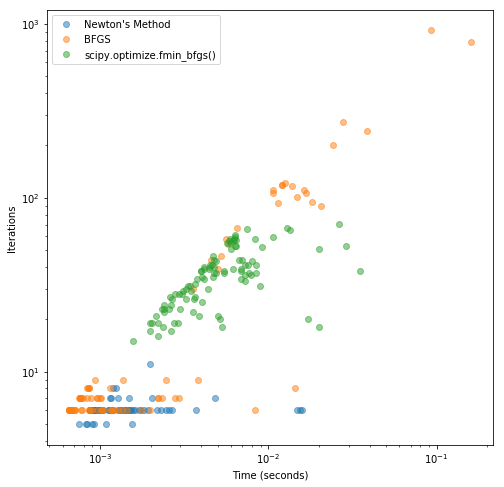

In [9]:
Compare(100)

4. Write a function that accepts a function for the proposed model $\phi(x)$, the model derivative $D_{\phi}(x)$, a function that returns the residual vector $r(x)$, a callable function that returns the Jacobian of the residual $Dr(x) = J(x)$, a starting point $x_0$, a max number of iterations $maxiter$, and a stopping tolerance $tol$. This method should implement the Gauss-Newton Method and return a list containing: the minimizing x value, the number of iterationsperformed, and if the method converged as a boolean.

    Test your function by using the Jacobian function, residual function, and starting point given in the example above. Compare your results to `scipy.optimize.leastsq()`.

In [10]:
def gauss_newton(r,J,x0,maxiter,tol):
    numiter = 0
    diff = 1
    isconverged = False
    
    while numiter < maxiter and diff > tol:
        rxk = r(x0)
        Jxk = J(x0)
        zk = la.solve(Jxk.T @ Jxk, Jxk.T @ rxk)
        x1 = x0 - zk
        diff = la.norm(x1-x0,np.inf)
        numiter += 1
        x0 = x1
        
    if diff < tol:
        isconverged = True
    
    return x1,numiter,isconverged

In [11]:
# Generate random data for t = 0, 1, ..., 10.
T = np.arange(10)
y = 3*np.sin(0.5*T)+ 0.5*np.random.randn(10) # Perturbed data.

# Define the model function and the residual (based on the data).
model = lambda x, t: x[0]*np.sin(x[1]*t) # phi(x,t)
residual = lambda x: model(x, T) - y # r(x) = phi(x,t) - y

# Define the Jacobian of the residual function, computed by hand.
jac = lambda x: np.column_stack((np.sin(x[1]*T), x[0]*T*np.cos(x[1]*T)))

x0 = np.array([2.5,.6])
x,niter,convergence = gauss_newton(residual,jac,x0,maxiter=1e4,tol=1e-6)

In [12]:
# Print results
print(x)
print('Gauss-Newton method has converged: %r' %convergence)
print('Number of iterations %d' %niter)

[3.45005772 0.49728041]
Gauss-Newton method has converged: True
Number of iterations 6


In [13]:
# Compare the result with opt.leastsq
x_ls,_ = opt.leastsq(func=residual, x0=np.array([2.5,.6]), Dfun=jac)
print(x_ls)

[3.45005769 0.49728042]


5. The file `population.npy` contains census data from the United States every ten years since 1790 for 16 decades. The first column $(t)$ gives the number of decades since 1790 in the decade $(0, 1, ...)$ and the second column $(y)$ gives the population count in millions of people.

    By plotting the data, and with a little knowledge about population growth, it is reasonable to hypothesize an exponential model for the population:    
    $$
    \phi\left(x_{1}, x_{2}, x_{3}, t\right)=x_{1} \exp \left(x_{2}\left(t+x_{3}\right)\right)
    $$    
    Use the initial guess $(1.5, .4, 2.5)$ for the parameters $(x1, x2, x3)$ and your Gauss Newton function or `scipy.optimize.leastsq()` to fit this model. Plot the resulting curve along with the actual data points.
    
    Unfortunately, the exponential model isn’t a very good fit for the data because the population grows exponentially for only the first 8 or so decades.a Instead, consider the following logistic model.
    $$
    \phi\left(x_{1}, x_{2}, x_{3}, t\right)=\frac{x_{1}}{1+\exp \left(-x_{2}\left(t+x_{3}\right)\right)}
    $$
    A reasonable initial guess for the parameters $(x_1, x_2, x_3)$ is $(150, .4,-15)$. Write functions for the model and the corresponding residual vector, then fit the model. Plot the data against the fitted curve (in the same plot as before). It should be a much better fit than the exponential curve.

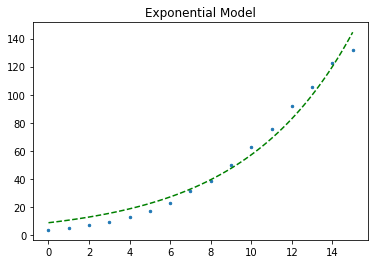

In [14]:
pop = np.load('population.npy')
y = pop[:,1]
T = pop[:,0]

model_exp = lambda x, t: x[0]*np.exp(x[1]*(t+x[2]))
residual_exp = lambda x: model_exp(x,T) - y
jac_exp = lambda x: np.column_stack((np.exp(x[1]*(T+x[2])),
                                     x[0]*(T+x[2])*np.exp(x[1]*(T+x[2])),
                                     x[0]*x[1]*np.exp(x[1]*(T+x[2]))))

x_exp = opt.leastsq(func=residual_exp, x0=np.array([1.5,.4,2.5]), Dfun=jac_exp)[0]
Tdom = np.linspace(0,15,100)
yfit_exp = model_exp(x_exp,Tdom)

# plot the resulting curve along with the actual data points
plt.scatter(T, y, label='Data', s=6, marker='o')
plt.plot(Tdom, yfit_exp, 'g--', label='Normal Equations')
plt.title("Exponential Model")
plt.show()

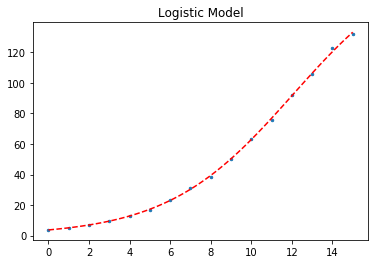

In [15]:
model_logit = lambda x, t: x[0]/(1+np.exp(-x[1]*(t+x[2])))
residual_logit = lambda x: model_logit(x,T) - y
jac_logit = lambda x: np.column_stack((1/(1+np.exp(-x[1]*(T+x[2]))),
                                     x[0]*np.exp(-x[1]*(T+x[2]))*(T+x[2])/(1+np.exp(-x[1]*(T+x[2])))**2,
                                     x[0]*np.exp(-x[1]*(T+x[2]))*x[1]/(1+np.exp(-x[1]*(T+x[2])))**2))

x_logit = opt.leastsq(func=residual_logit, x0=np.array([150,.4,-15]), Dfun=jac_logit)[0]
yfit_logit = model_logit(x_logit,Tdom)

# plot the resulting curve along with the actual data points
plt.scatter(T, y, label='Data', s=6, marker='o')
plt.plot(Tdom, yfit_logit, 'r--', label='Normal Equations')
plt.title("Logistic Model")
plt.show()